# Cardiovascular Disease vs Social Determinants

## Data Sourcing, Cleaning, and Merging

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import itertools as iterate
# Resource files
CD_data_path = "Resources/Cardiovascular_Disease_Data.csv"
census_data_path = "Resources/2018_Census_Data.csv"

# Read the Cardiovascular Disease data and Census data
CD_data = pd.read_csv(CD_data_path, low_memory=False)
census_data = pd.read_csv(census_data_path, low_memory=False)

# State name to abbreviated version
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# Cleaning Cardiovascular Data
CD_data = CD_data[CD_data["Year"]=="2018"] # Grabbing rows with the Year 2018 only
CD_data = CD_data[["Year", 
                   "LocationAbbr", 
                   "LocationDesc", 
                   "Topic", 
                   "Data_Value", 
                   "Stratification1"]] # Grabbing relevant columns
CD_data.columns = ["Year", 
                   "State", 
                   "County", 
                   "Disease Type", 
                   "Mortality per 100k", 
                   "Age Group"] # Renaming columns
CD_data["County, State"] = CD_data["County"] + " County, " + CD_data["State"] # Create a column that will be used to merge with other dataset
CD_data = CD_data[["Year", "County, State", "State", "Disease Type", "Mortality per 100k", "Age Group"]]

# Cleaning Census Data
census_data = census_data[["STATE",
                           "COUNTY",
                           "ACS_MEDIAN_HH_INC",
                           "ACS_PCT_COLLEGE_ASSOCIATE_DGR",
                           "ACS_PCT_BACHELOR_DGR",
                           "ACS_PCT_GRADUATE_DGR",
                           "ACS_PCT_HS_GRADUATE",
                           "ACS_PCT_LT_HS",
                           "ACS_PCT_UNINSURED",
                           "ACS_PCT_MEDICAID_ANY",
                           "ACS_PCT_PRIVATE_ANY"]] # Grabbing relevant columns
census_data.columns = ["State",
                       "County",
                       "County Median Income",
                       "% College/Associate's Degree",
                       "% Bachelor Degree",
                       "% Graduate Degree",
                       "% Only HS Degree",
                       "% less than a HS Degree",
                       "% Uninsured",
                       "% Medicaid Only",
                       "% Private Insurance Only"] # Renaming columns

census_data["County, State"] = census_data["County"] + ", " + census_data["State"].replace(us_state_to_abbrev) # Create a column that will be used to merge with other dataset
census_data["% HS Degree and Below"] = census_data["% Only HS Degree"] + census_data["% less than a HS Degree"]
census_data["% Above HS Degree"] = census_data["% College/Associate's Degree"] + census_data["% Bachelor Degree"] + census_data["% Graduate Degree"]
census_data = round(census_data.groupby("County, State").mean(), 3) # Average rows with same counties

census_data = census_data[["County Median Income",
                           "% HS Degree and Below",
                           "% Above HS Degree",
                           "% Uninsured",
                           "% Medicaid Only",
                           "% Private Insurance Only"]]

df = pd.merge(CD_data, census_data, how = "left", left_on = "County, State", right_index = True).dropna(axis=0) # Merging cardiovascular data and census data
df_state_income = df.groupby("State")["County Median Income"].mean().rename("State Average Income") # Finding median income by state
df = pd.merge(df, df_state_income, how = "left", left_on = "State", right_index = True) # Adding column to main dataframe
df.head()

C:\Users\didie\AppData\Local\Temp\ipykernel_25720\2772663106.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  census_data = round(census_data.groupby("County, State").mean(), 3) # Average rows with same counties


,Year,"County, State",State,Disease Type,Mortality per 100k,Age Group,County Median Income,% HS Degree and Below,% Above HS Degree,% Uninsured,% Medicaid Only,% Private Insurance Only,State Average Income
21,2018,"Autauga County, AL",AL,Stroke,23.5,Ages 35-64 years,55499.25,47.772,52.228,7.979,16.097,57.621,41685.122448
42,2018,"Autauga County, AL",AL,Coronary Heart Disease,87.9,Ages 35-64 years,55499.25,47.772,52.228,7.979,16.097,57.621,41685.122448
62,2018,"Autauga County, AL",AL,Stroke,368.6,Ages 65 years and older,55499.25,47.772,52.228,7.979,16.097,57.621,41685.122448
82,2018,"Autauga County, AL",AL,Coronary Heart Disease,689.9,Ages 65 years and older,55499.25,47.772,52.228,7.979,16.097,57.621,41685.122448
115,2018,"Baldwin County, AL",AL,Stroke,18.1,Ages 35-64 years,56782.71,40.205,59.796,10.276,12.572,59.858,41685.122448


## Exploratory Data Analysis (EDA)

### Summary Statistics for Mortality Rate by Age Group and Disease Type

In [2]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
]

df_stats = df.groupby(["Disease Type", "Age Group"])["Mortality per 100k"].agg(func=stats) # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats



Mean  Median  \
Disease Type           Age Group                                     
Coronary Heart Disease Ages 35-64 years          70.898076    64.2   
                       Ages 65 years and older  628.655387   605.9   
Stroke                 Ages 35-64 years          16.864551    15.3   
                       Ages 65 years and older  267.846506   262.2   

                                                       Std  Minimum  Maximum  
Disease Type           Age Group                                              
Coronary Heart Disease Ages 35-64 years          31.149991     13.3    300.7  
                       Ages 65 years and older  175.914496    207.1   1609.8  
Stroke                 Ages 35-64 years           6.306468      5.6     48.1  
                       Ages 65 years and older   48.985936    107.9    596.4

### Distribution of Mortality Rate by Age Group and Disease Type

#### Disease Type: Coronary Heart Disease

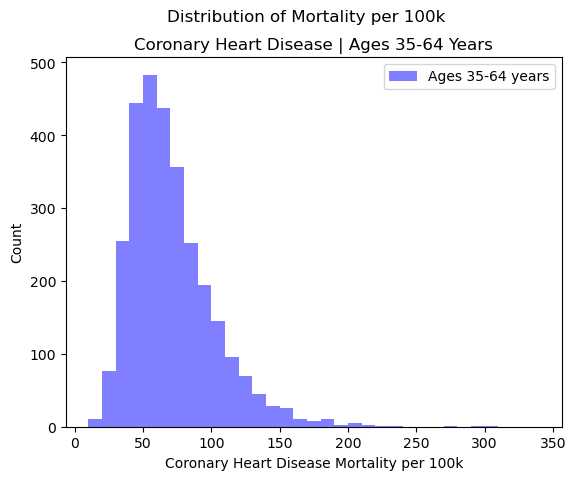

In [3]:
# Ages 35-64 years
bins = list(range(10, 350, 10))
plt.hist(df[(df["Age Group"] == "Ages 35-64 years") & (df["Disease Type"] == "Coronary Heart Disease")]["Mortality per 100k"], bins, alpha = 0.5, color = "blue", label = "Ages 35-64 years")
plt.xlabel("Coronary Heart Disease Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Coronary Heart Disease | Ages 35-64 Years")
plt.legend()

plt.show()

The histogram of mortality by CHD of Ages 35-64 years is a right-skewed histogram. As it can be seen, it has a long tail on its right side and the peak of the data distribution is on the left side and the mean (70.89) is greater than the median (64.2). There may be some outliers on the right side of the graph which is indicated by tail of distribution on the right hand side is longer than the  tail on the left hand side.


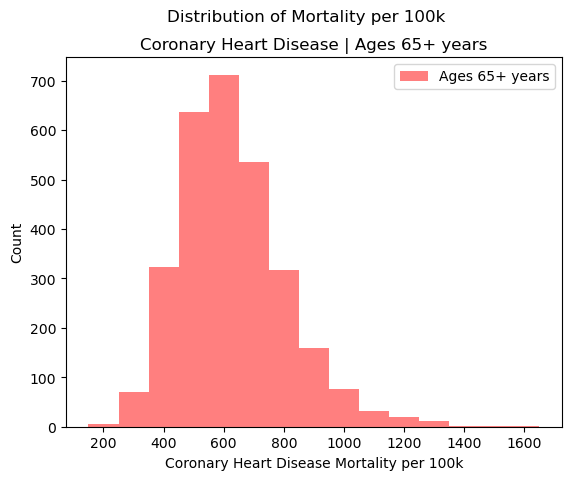

In [4]:
# Ages 65+ years
bins = list(range(150, 1750, 100))
plt.hist(df[(df["Age Group"] == "Ages 65 years and older") & (df["Disease Type"] == "Coronary Heart Disease")]["Mortality per 100k"], bins, alpha = 0.5, color = "red", label = "Ages 65+ years")
plt.xlabel("Coronary Heart Disease Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Coronary Heart Disease | Ages 65+ years")
plt.legend()



plt.show()

The histogram of mortality by CHD of Ages 65+ years shows degree of asymmetry and is a right-skewed histogram. The mean of Ages 65+ years is 628.655, which is greater than its median of 628.655. Hence, there is a long tail on its right side and the peak of the data distribution is on the left side. There are some outliers on the right side of the graph with extreme values, that can been seen in the graph by the tail of distribution on the right hand side.


#### Disease Type: Stroke

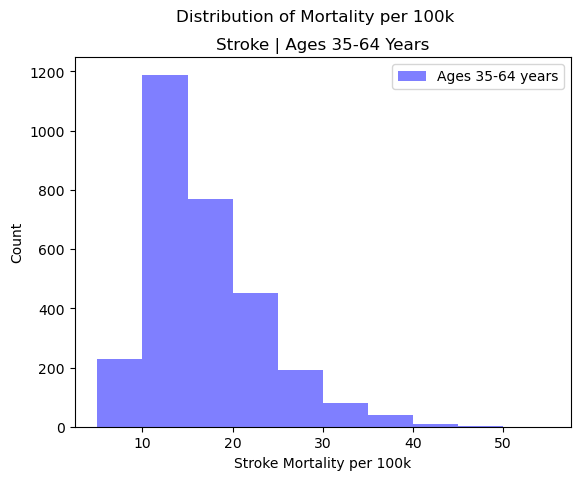

In [5]:
# Ages 35-64 years
bins = list(range(5, 60, 5))
plt.hist(df[(df["Age Group"] == "Ages 35-64 years") & (df["Disease Type"] == "Stroke")]["Mortality per 100k"], bins, alpha = 0.5, color = "blue", label = "Ages 35-64 years")
plt.xlabel("Stroke Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Stroke | Ages 35-64 Years")
plt.legend()
plt.show()

The histogram of mortality by stroke of Ages 35-64 years shows right-skewness. Right-skewness is demonstrated when data points are not distributed symmetrically to the left and right sides of the median. As it is evident from summary statistics table and histogram which has a long tail on its right side and the peak of the data distribution is on the left side and the mean (16.86) is greater than the median (15.3).There may be some outliers on the right side of the graph but the number cannot be determined from the histogram. Boxplots will be used later to visualize outliers and will be presented later in the analysis.


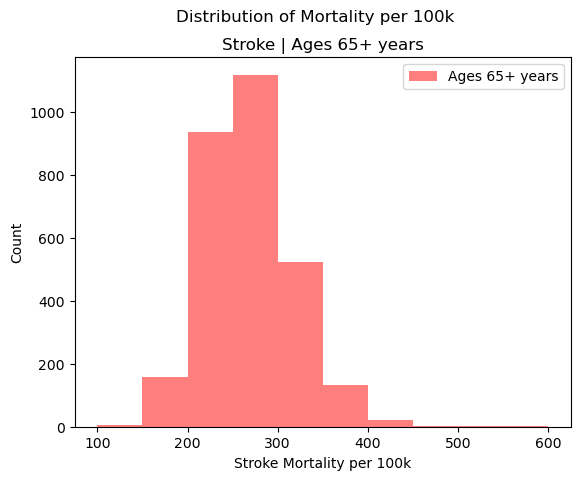

In [6]:
# Ages 65+ years
bins = list(range(100, 650, 50))
plt.hist(df[(df["Age Group"] == "Ages 65 years and older") & (df["Disease Type"] == "Stroke")]["Mortality per 100k"], bins, alpha = 0.5, color = "red", label = "Ages 65+ years")
plt.xlabel("Stroke Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Stroke | Ages 65+ years")
plt.legend()
plt.show()

The histogram of mortality by stroke of Ages 65+ years shows degree of asymmetry and is a right-skewed histogram. The mean of Ages 65+ years is 267.84, which is greater than its median of 262.2. Hence, there is a long tail on its right side and the peak of the data distribution is on the left side. There may be some outliers on the right side of the graph with extreme values, that can been seen in the graph by the tail of distribution on the right hand side.

### Summary Statistics for State Average Income

In [7]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
        ]

df_stats = df[["State Average Income"]].agg(func=stats).transpose() # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
round(df_stats, 2)

,Mean,Median,Std,Minimum,Maximum
State Average Income,52286.68,51642.75,7823.4,38350.88,83854.98


### Distribution of State Average Income

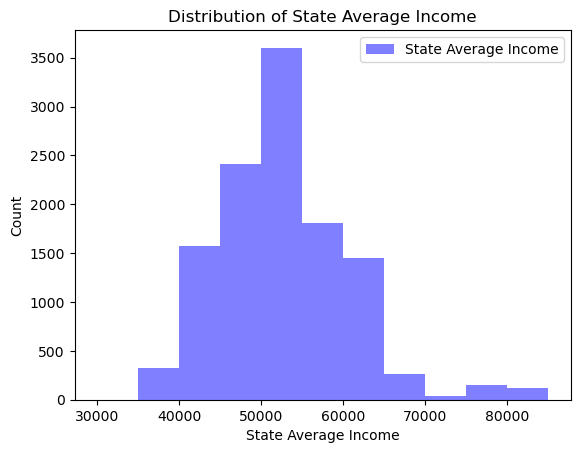

In [8]:
bins = list(range(30000, 90000, 5000))
plt.hist(df["State Average Income"], bins, alpha = 0.5, color = "blue", label = "State Average Income")
plt.xlabel("State Average Income")
plt.ylabel("Count")
plt.title("Distribution of State Average Income")
plt.legend()

The histogram of state average income is slightly non-normal distribution. The histrogram is slightly right-skewed with mean greater than median. The sample of population's average income distribution histogram is slightly right-skewed, indicating that most people or households have moderate to low incomes. While there is still a general trend of decreasing frequencies as income increases, the tail on the right side of the histogram is not as long or pronounced as in a heavily right-skewed distribution.

This distribution pattern suggests that income inequality is less severe than in a substantially right-skewed distribution. It suggests that a large section of the population is middle-class, while a smaller number is wealthy. The presence of a slight right skewness can be attributed to many factors such as Education, skills, career prospects, and cost of living.

### Distribution of State Average Income

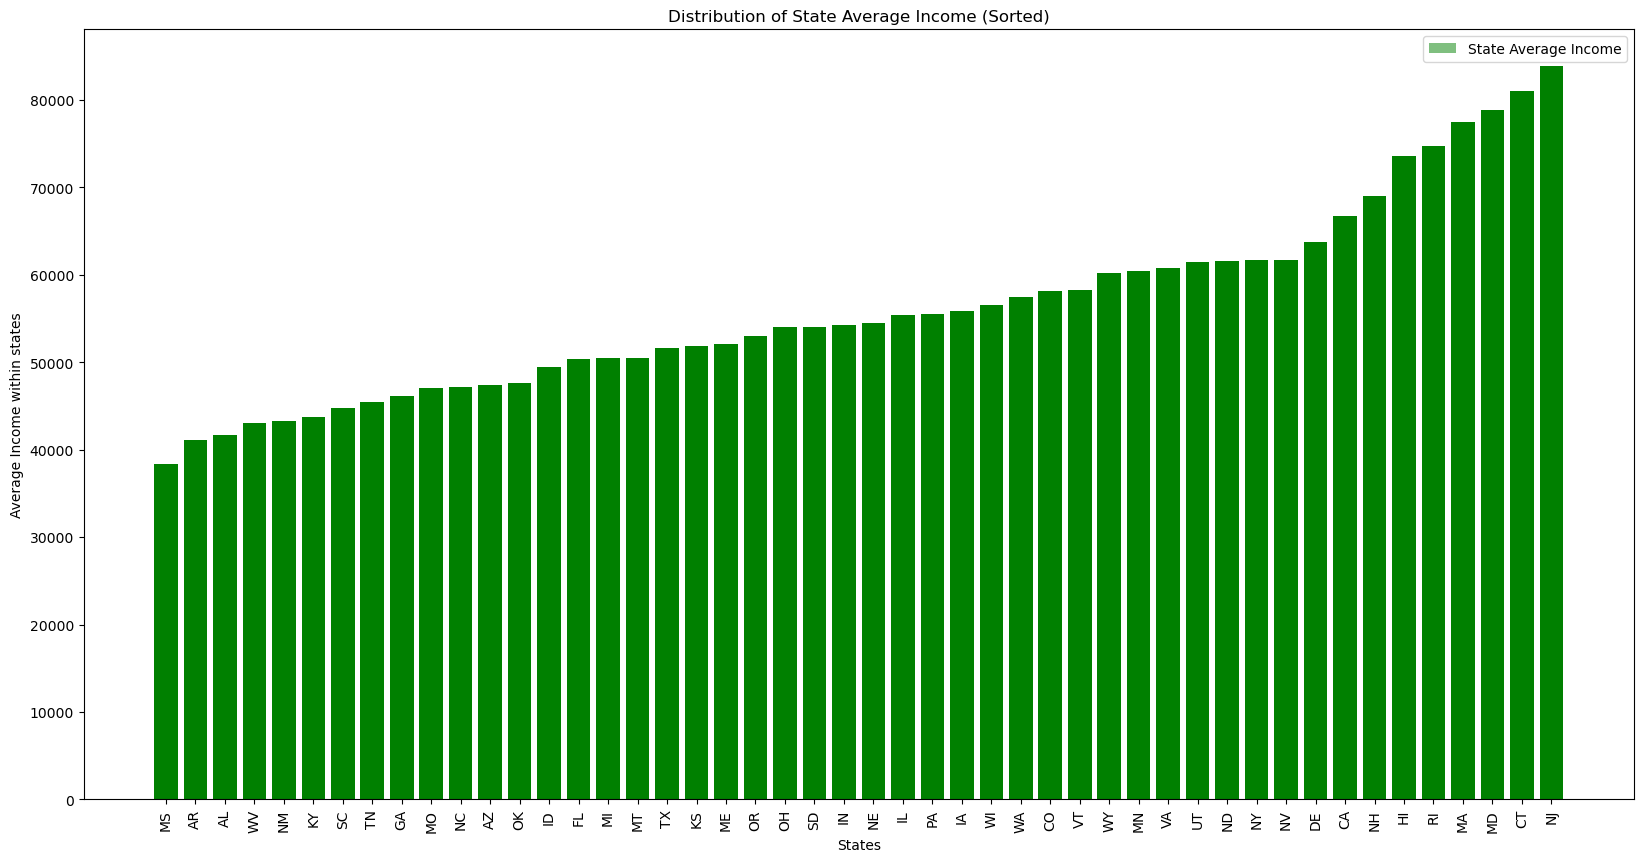

In [9]:
# DataFrame called df with columns "State" and "State Average Income"

# Combine "State" and "State Average Income" columns and sort in ascending order by income
sorted_data = sorted(zip(df["State"], df["State Average Income"]), key=lambda x: x[1])

# Extract sorted state and income values into separate lists
sorted_states, sorted_incomes = zip(*sorted_data)

# Plot the sorted bar graph
plt.figure(figsize = (20, 10))
plt.bar(sorted_states, sorted_incomes, alpha=0.5, color="green", label="State Average Income", align="center")

plt.xlabel("States")
plt.ylabel("Average Income within states")
plt.title("Distribution of State Average Income (Sorted)")

plt.xticks(rotation=90)  # Rotate the x-axis labels if needed

plt.legend()
plt.show()


#### Findings from Visualization of the distribution of income levels across different states.
The above bar graph shows the ascending order visual representation of the state average income values in increasing order. It allows for comparisons between states and reveals patterns in income distribution across the dataset.
The ascending bars show the range of state average income values, indicating that different states have varying income levels. States with lower bars indicate relatively lower average incomes, while states with higher bars represent relatively higher average incomes.
The New Jersey (NJ) and Connecticut (CT) states have the highest bars on the graph that indicates these states have highest average income levels. Whereas, Mississippi (MS) state with the lowest bars represent that it has lowest average income levels.
The differences in bar heights reveals the disparities in income distribution across the states within USA. A significant variation in bar heights suggests a larger income disparity between the highest and lowest average incomes among the states. This can indicate the presence of income inequality within the dataset. The lowest average income level state MS as \\$38,350.88 as income and the highest average income level state NJ has \\$83,854.97 average income.

### Summary Statistics for Education

In [10]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
        ]

df_stats = df[["% HS Degree and Below",
               "% Above HS Degree"
              ]].agg(func=stats).transpose() # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats

,Mean,Median,Std,Minimum,Maximum
% HS Degree and Below,48.014859,48.414,10.461118,12.295,79.230
% Above HS Degree,51.985146,51.585,10.461126,20.770,87.705


### Distribution of Education

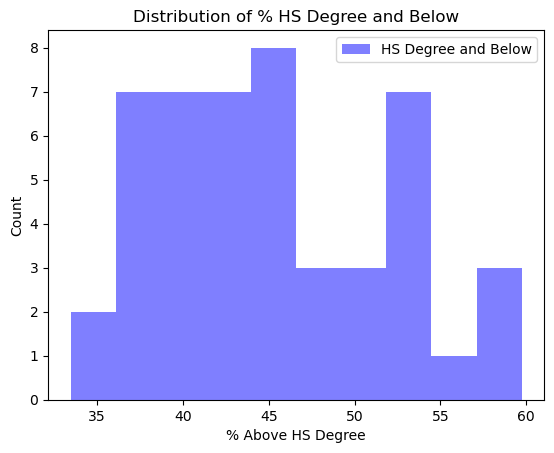

In [11]:
#bins = list(range(30000, 90000, 5000))
plt.hist(df.groupby("State")["% HS Degree and Below"].mean(), alpha = 0.5, color = "blue", label = "HS Degree and Below")
plt.xlabel("% Above HS Degree")
plt.ylabel("Count")
plt.title("Distribution of % HS Degree and Below")
plt.legend()

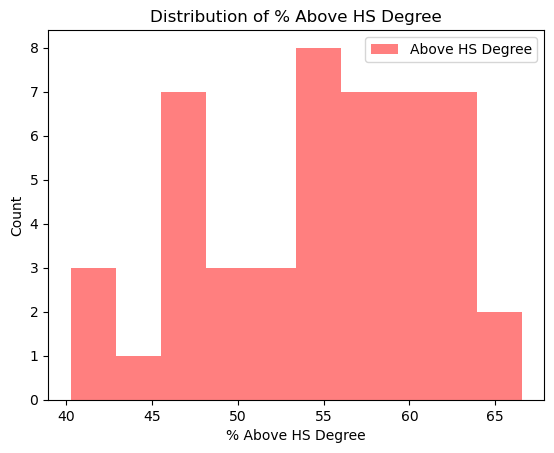

In [12]:
#bins = list(range(30000, 90000, 5000))
plt.hist(df.groupby("State")["% Above HS Degree"].mean(), alpha = 0.5, color = "red", label = "Above HS Degree")
plt.xlabel("% Above HS Degree")
plt.ylabel("Count")
plt.title("Distribution of % Above HS Degree")
plt.legend()

In [13]:
less_hs = df.groupby(["State"])["% HS Degree and Below"].mean()
high_hs = df.groupby(["State"])["% Above HS Degree"].mean()

df_state_education = pd.concat([less_hs, high_hs], axis = 1)
df_state_education.columns = ["HS Degree and Below", "Above HS Degree"]
df_state_education.head()

,HS Degree and Below,Above HS Degree
State,,
AL,54.401403,45.598254
AR,55.441840,44.558080
AZ,45.077933,54.922067
CA,39.088614,60.911439
CO,36.782403,63.217866


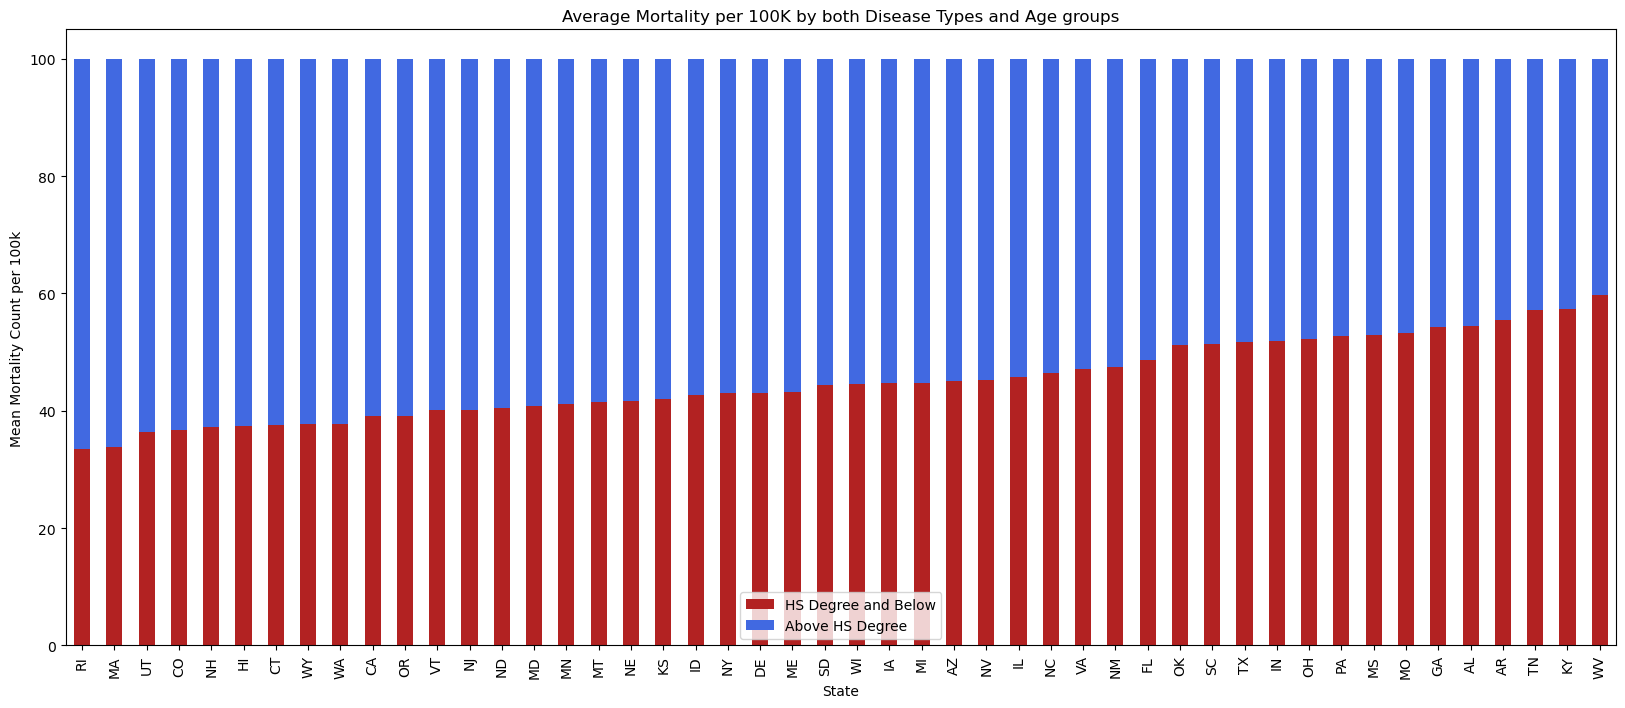

In [14]:
df_state_education = df_state_education.sort_values(by = "HS Degree and Below")
bar_chart_states = df_state_education[["HS Degree and Below", "Above HS Degree"]].plot(kind = "bar", 
                                           color = ["firebrick", "royalblue"], 
                                           figsize = (20,8), 
                                           ylabel = "Mean Mortality Count per 100k", 
                                           stacked = True)
plt.title ("Average Mortality per 100K by both Disease Types and Age groups")
plt.show()

Text(0, 0.5, 'Percent')

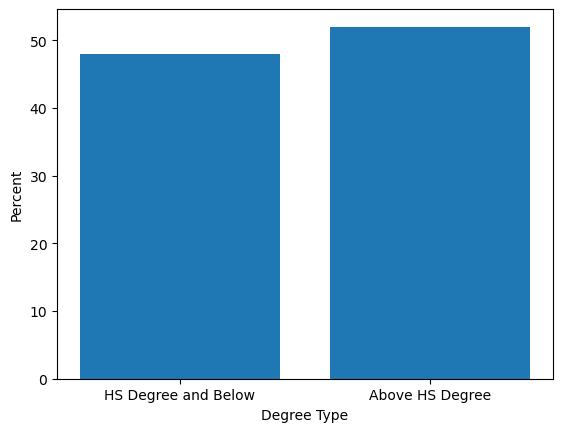

In [15]:
plt.bar(df_stats.index, df_stats["Mean"])
plt.xticks([0, 1], ["HS Degree and Below", "Above HS Degree"])
plt.xlabel("Degree Type")
plt.ylabel("Percent")

#### Findings and Interpretation from Visualization of Degree Type:
The bar chart of degree type shows almost two equal ditribution. Data set has sample with  almost equal percentage of people with High school degree & below comparison to people with who have above high school degree. We can infer that data is normally distributed among the these two degree types as the mean and median of each degree type is almost same. 

### Summary Statistics for Insurance

In [16]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
        ]

df_stats = df[["% Uninsured",
               "% Medicaid Only", 
               "% Private Insurance Only"
              ]].agg(func=stats).transpose() # Generating stats dataframe

df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats

,Mean,Median,Std,Minimum,Maximum
% Uninsured,9.989589,9.114,4.913097,1.686,42.38
% Medicaid Only,17.539307,16.645,7.275314,2.170,57.85
% Private Insurance Only,57.833914,58.309,10.414717,12.940,85.62


### Average State Mortality per 100k by Disease Type and Age Group

In [17]:
stroke35 = df[(df["Age Group"]=="Ages 35-64 years")&(df["Disease Type"]== "Stroke")].groupby(["State"])["Mortality per 100k"].mean()
stroke65 = df[(df["Age Group"]=="Ages 65 years and older")&(df["Disease Type"]== "Stroke")].groupby(["State"])["Mortality per 100k"].mean()
CHD35 = df[(df["Age Group"]=="Ages 35-64 years")&(df["Disease Type"]== "Coronary Heart Disease")].groupby(["State"])["Mortality per 100k"].mean()
CHD65 = df[(df["Age Group"]=="Ages 65 years and older")&(df["Disease Type"]== "Coronary Heart Disease")].groupby(["State"])["Mortality per 100k"].mean()

df_state_mortality = pd.concat([stroke35, stroke65, CHD35, CHD65], axis = 1)
df_state_mortality.columns = ["Stroke, 35", "Stroke, 65", "CDH, 35","CDH, 65"]
df_state_mortality.head()

,"Stroke, 35","Stroke, 65","CDH, 35","CDH, 65"
State,,,,
AL,27.794030,330.482090,74.156716,526.216418
AR,25.365333,287.253333,114.700000,797.326667
AZ,14.306667,217.760000,62.020000,603.913333
CA,14.778947,267.733333,47.568421,550.008772
CO,11.218033,228.510345,40.516393,437.720690


### Stacked Barplot of the Average State Mortalities

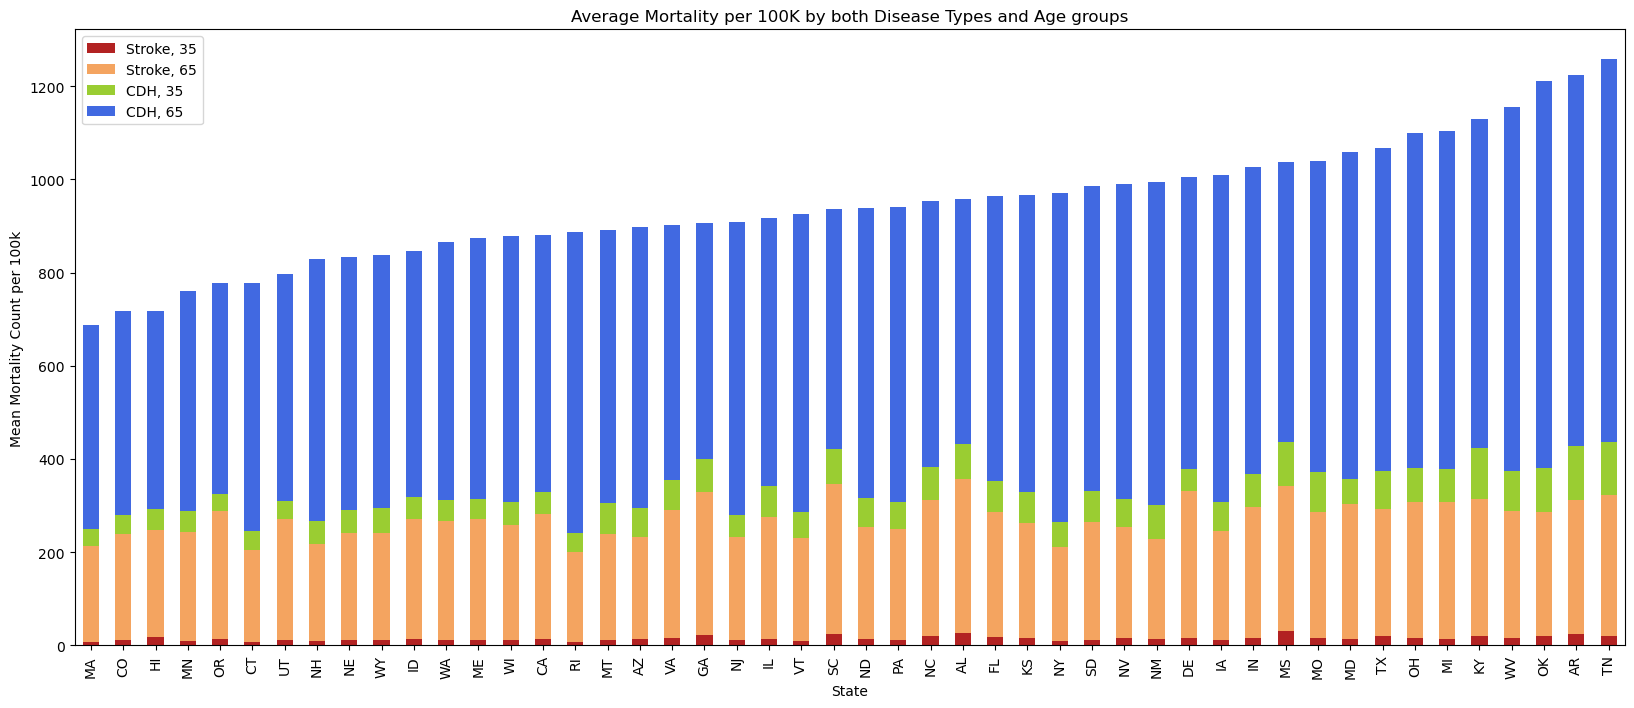

In [18]:
df_state_mortality["SUM"] = df_state_mortality.sum(axis = 1)
df_state_mortality = df_state_mortality.sort_values(by = "SUM")
bar_chart_states = df_state_mortality[["Stroke, 35", "Stroke, 65", "CDH, 35","CDH, 65"]].plot(kind = "bar", 
                                           color = ["firebrick", "sandybrown", "yellowgreen", "royalblue"], 
                                           figsize = (20,8), 
                                           ylabel = "Mean Mortality Count per 100k", 
                                           stacked = True)
plt.title ("Average Mortality per 100K by both Disease Types and Age groups")
plt.show()

In [19]:
# Calculating the mean of the "Mortality per 100k" column
mean_mortality = df["Mortality per 100k"].mean()

# Print the mean value
print("Mean Mortality per 100k:", mean_mortality)


Mean Mortality per 100k: 244.1018322822567


#### Findings and Interpretation from Visualization of the Stacked Barplot:
The purpose of this stacked barplot visualization is to  better comprehend the pattern of average state mortality. The mortality count from both type of heart diseases (CHD and Stroke) and across all age groups in each state are graphically shown in the stacked barplot. Death rates in a state can be affected by a number of factors, and we can learn more about these influences by analyzing the distribution.

The analysis makes use of a dataset detailing state-level mortality rates per 100,000 residents. The rows of the dataset reflect the 50 states and the columns represent the two type of heart diseases and age categories (35-64 years and 65+ years). Specifically, we use stacked barplots, where each bar represents a state and is further subdivided into segments for each disease category and age group. Upon visualizing the stacked barplot of average state mortalities, several key observations can be made:

1. Disease Type Contributions: The vertical segments within each state's bar indicate the contributions of different disease types to overall mortality. The varying lengths of the segments reflect the relative impact of specific diseases in different states. The leading cause of mortality is by Coronoary heart disease (CHD) among 65+ years across all the states and followed by Stroke in the same age group.

2. Age Group Patterns: The color variations observed within each disease type category correspond to distinct age cohorts. Through an examination of the chromatic composition within individual segments, it is possible to gain insight into the variations in mortality rates among distinct age cohorts. The data visualization provides evidence that 65+ years age group people have more mortality by both heart disease type.This data has the potential to illuminate age-related vulnerability and inform focused interventions or healthcare measures. Hence, Centre of Disease control (CDC) should focus their research on how tp prevent heart diseases among this group and what are the possible causes other than age such as lifestyle, eating habits, finanical or emotional stress.

3. State Mortality Comparisons: The comparison of state mortalities can be made by analyzing the heights of the bars, which allows for the identification of variations in average mortality rates across different states. States with higher overall mortality rates are represented by higher bars such as Arizona (AR), Oklahoma (OK) and Tennessee (TN); whereas lower bars of states such as Massachusetts (MA) and Colorado (CO) indicate relatively lower average mortalities. This comparative analysis offers valuable insights into the regional disparities in mortality rates, thereby indicating the need for targeted interventions and additional research in particular geographic regions.

Lastly, one should not easily conclude that lower income states will have higher mortality rates. This pattern is very irregular as per the data visualization: one such case to note is that Georgia state is on lower side of average income but has lower mortality rates. Hence, there are various other factors that lead to heart disease and cause mortality.

### Distribution of Insurance

Text(0, 0.5, 'Percent')

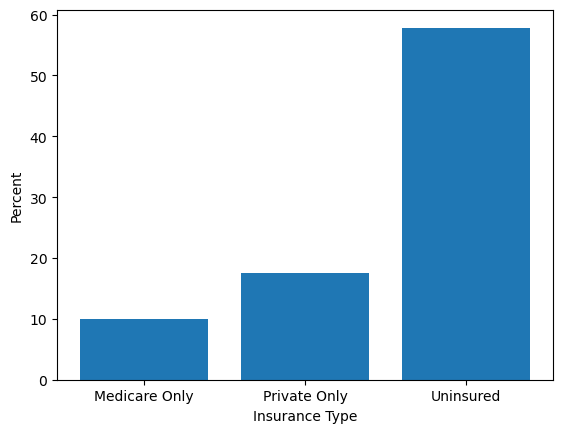

In [20]:
plt.bar(df_stats.index, df_stats["Mean"])
plt.xticks([0, 1, 2], ["Medicare Only", "Private Only", "Uninsured"])
plt.xlabel("Insurance Type")
plt.ylabel("Percent")

# Findings and Interpretation from Visualization of Insurance Type:

This data visualizes and understands the distribution of insurance types in the US, specifically "Medicare Only," "Private Only," and "Uninsured." The bar chart shows the proportion of each insurance type, revealing coverage gaps and healthcare access issues. The bar chart illustrates the following:

Medicare Only: The height of the "Medicare Only" bar represents the percentage of people who use Medicare for health insurance. The bar's height shows population Medicare coverage which is very low as compared to other two types of insurance.

Private Only: The "Private Only" bar shows the percentage of people with private health insurance only. Employers, individuals, and organizations offer private insurance. The bar's height shows private insurance's involvement in healthcare is more popular among the people. 

Uninsured: The "Uninsured" bar shows the percentage of people without health insurance. These people lack insurance. Understanding the uninsured population helps reveal healthcare gaps and needs support.

## DataFrame Analysis: Linear Regression Equations & R-values

### Compared to Income

In [21]:
uninsured = df.groupby(["State"])["% Uninsured"].mean()
medicaid = df.groupby(["State"])["% Medicaid Only"].mean()
priv_insurance = df.groupby(["State"])["% Private Insurance Only"].mean()

df_state_insurance = pd.concat([uninsured, medicaid, priv_insurance], axis = 1)
df_state_insurance.columns = ["Uninsured", "Medicaid", "Private Inusrance"]
df_state_insurance.head()

,Uninsured,Medicaid,Private Inusrance
State,,,
AL,10.782194,19.714075,53.188269
AR,8.672387,26.277747,48.130693
AZ,11.407667,23.941333,47.524267
CA,7.785895,23.195070,55.382614
CO,9.812286,19.600387,56.574891


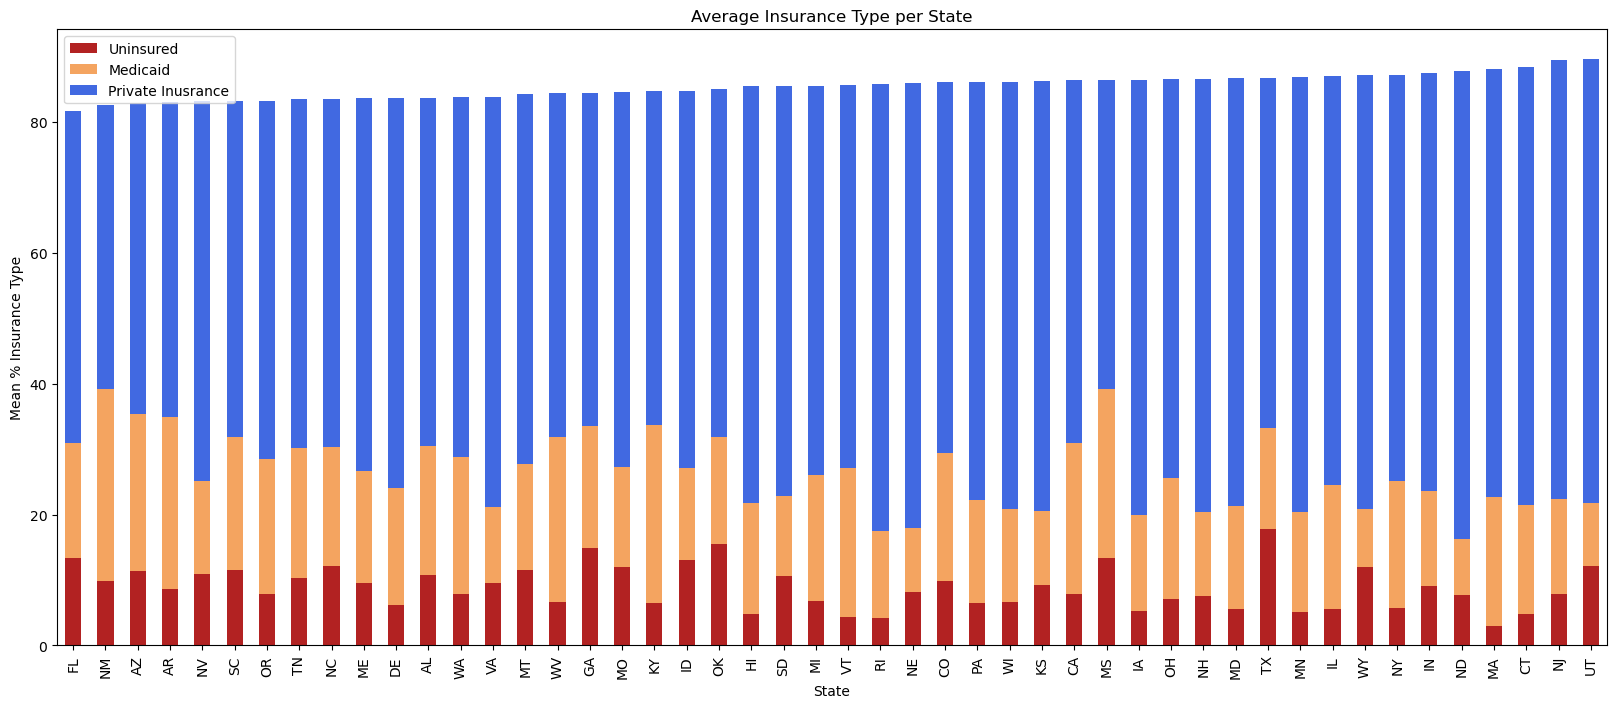

In [22]:
df_state_insurance["SUM"] = df_state_insurance.sum(axis = 1)
df_state_insurance = df_state_insurance.sort_values(by = "SUM")
bar_chart_states = df_state_insurance[["Uninsured", "Medicaid", "Private Inusrance"]].plot(kind = "bar", 
                                           color = ["firebrick", "sandybrown", "royalblue"], 
                                           figsize = (20,8), 
                                           ylabel = "Mean % Insurance Type", 
                                           stacked = True)
plt.title ("Average Insurance Type per State")
plt.show()

Text(0, 0.5, 'Percent')

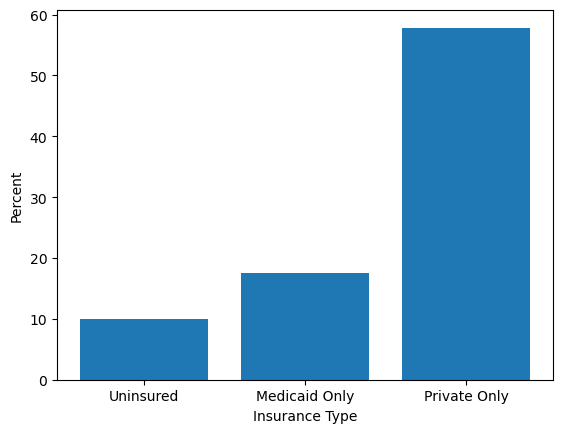

In [23]:
plt.bar(df_stats.index, df_stats["Mean"])
plt.xticks([0, 1, 2], ["Uninsured", "Medicaid Only", "Private Only"])
plt.xlabel("Insurance Type")
plt.ylabel("Percent")

#### Findings and Interpretation from Visualization of Insurance Type:

This data visualizes and understands the distribution of insurance types in the US, specifically "Medicaid Only," "Private Only," and "Uninsured." The bar chart shows the proportion of each insurance type, revealing coverage gaps and healthcare access issues. The bar chart illustrates the following:

Medicaid Only: The height of the "Medicaid Only" bar represents the percentage of people who use Medicaid for health insurance. The bar's height shows population Medicaid coverage which is very low as compared to other two types of insurance.

Private Only: The "Private Only" bar shows the percentage of people with private health insurance only. Employers, individuals, and organizations offer private insurance. The bar's height shows private insurance's involvement in healthcare is more popular among the people. 

Uninsured: The "Uninsured" bar shows the percentage of people without health insurance. These people lack insurance. Understanding the uninsured population helps reveal healthcare gaps and needs support.

## DataFrame Analysis: Linear Regression Equations & R-values

### Compared to Income

In [24]:
disease_type = ["Coronary Heart Disease", "Stroke"]
age_group = ["Ages 35-64 years", "Ages 65 years and older"]

equations = []
r_values = []
diseases = []
ages = []

for disease in disease_type:
    for age in age_group:
        data = df[(df["Disease Type"] == disease) & (df["Age Group"] == age)].groupby("State")
        x = data["State Average Income"].mean()
        y = data["Mortality per 100k"].mean()
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
        line_eq = str(round(slope,5)) + "x + " + str(round(intercept,2))
        equations.append(line_eq)
        r_values.append(rvalue)
        diseases.append(disease)
        ages.append(age)
            
tuples = list(zip(*[diseases, ages]))
index = pd.MultiIndex.from_tuples(tuples, names=["Disease Type", "Age Group"])
data = {"Linear EQs": equations, "r-values": r_values}
pd.DataFrame(data = data, index = index)

Linear EQs  r-values
Disease Type           Age Group                                            
Coronary Heart Disease Ages 35-64 years         -0.00126x + 133.98 -0.692173
                       Ages 65 years and older  -0.00284x + 769.48 -0.311891
Stroke                 Ages 35-64 years           -0.0003x + 32.35 -0.642087
                       Ages 65 years and older  -0.00178x + 356.74 -0.556237

In this analysis, we examine the negative relationship between age and the incidence of coronary heart disease and stroke. Understanding how age influences these diseases is crucial for developing effective prevention strategies and providing appropriate healthcare for different age groups. By analyzing the provided data on coronary heart disease and stroke rates among individuals aged 35-64 years and those aged 65 years and older, we aim to uncover the relationship between age and the risk of these conditions.
#### Coronary Heart Disease:
#### Age Group: 35-64 years
- The relationship between age and the incidence of coronary heart disease in the 35-64 age group is represented by the equation: -0.00126x + 133.98, where x denotes age.
- The negative coefficient (-0.00126) indicates that as age increases, the rate of coronary heart disease decreases.
- However, the correlation coefficient (-0.692173) suggests a relatively weak negative relationship, indicating that age alone does not fully explain the risk of coronary heart disease in this age group.
#### Age Group: 65 years and older
- The relationship between age and the incidence of coronary heart disease in the 65 and older age group is described by the equation: -0.00284x + 769.48.
- The negative coefficient (-0.00284) implies that as age increases, the rate of coronary heart disease decreases.
- The correlation coefficient (-0.311891) suggests a relatively weak negative relationship, indicating that age alone does not fully account for the risk of coronary heart disease in this age group.
#### Stroke:
#### Age Group: 35-64 years
- The relationship between age and the incidence of stroke in the 35-64 age group can be represented by the equation: -0.0003x + 32.35.
- The negative coefficient (-0.0003) indicates that as age increases, the rate of stroke decreases.
- The correlation coefficient (-0.642087) suggests a moderate negative relationship, indicating that age plays a somewhat stronger role in influencing the risk of stroke in this age group compared to coronary heart disease.
#### Age Group: 65 years and older
- The relationship between age and the incidence of stroke in the 65 and older age group is described by the equation: -0.00178x + 356.74.
- The negative coefficient (-0.00178) suggests that as age increases, the rate of stroke decreases.
The correlation coefficient (-0.556237) indicates a moderate negative relationship, implying that age has a significant impact on the risk of stroke in this age group.

### Compared to Education

In [25]:
disease_type = ["Coronary Heart Disease", "Stroke"]
age_group = ["Ages 35-64 years", "Ages 65 years and older"]
education_level = ["% HS Degree and Below", "% Above HS Degree"]

equations = []
r_values = []
educations = []
diseases = []
ages = []

for education in education_level:
    for disease in disease_type:
        for age in age_group:
            data = df[(df["Disease Type"] == disease) & (df["Age Group"] == age)].groupby("State")
            x = data[education].mean()
            y = data["Mortality per 100k"].mean()
            (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
            line_eq = str(round(slope,5)) + "x + " + str(round(intercept,2))
            equations.append(line_eq)
            r_values.append(rvalue)
            educations.append(education)
            diseases.append(disease)
            ages.append(age)
            
tuples = list(zip(*[educations, diseases, ages]))
index = pd.MultiIndex.from_tuples(tuples, names=["Education Level", "Disease Type", "Age Group"])
data = {"Linear EQs": equations, "r-values": r_values}
pd.DataFrame(data = data, index = index)

Linear EQs  \
Education Level       Disease Type           Age Group                                      
% HS Degree and Below Coronary Heart Disease Ages 35-64 years            2.55578x + -52.4   
                                             Ages 65 years and older     8.4606x + 228.11   
                      Stroke                 Ages 35-64 years           0.55997x + -10.03   
                                             Ages 65 years and older     3.40033x + 103.4   
% Above HS Degree     Coronary Heart Disease Ages 35-64 years          -2.55576x + 203.18   
                                             Ages 65 years and older  -8.46054x + 1074.17   
                      Stroke                 Ages 35-64 years           -0.55997x + 45.97   
                                             Ages 65 years and older   -3.40028x + 443.43   

                                                                      r-values  
Education Level       Disease Type           Age Group                          
% HS Degree and Below Coronary Heart Disease Ages 35-64 years         0.861836  
                                             Ages 65 years and older  0.571237  
                      Stroke                 Ages 35-64 years         0.727201  
                                             Ages 65 years and older  0.654235  
% Above HS Degree     Coronary Heart Disease Ages 35-64 years        -0.861838  
                                             Ages 65 years and older -0.571235  
                      Stroke                 Ages 35-64 years        -0.727209  
                                             Ages 65 years and older -0.654230

#### % Above HS Degree
#### Coronary Heart Disease:
- Ages 35-64 years: The risk of coronary heart disease decreases as the percentage of individuals with education above high school (x) increases. The risk equation is -2.55576x + 203.18, indicating a negative slope. The correlation coefficient of -0.861838 suggests a strong negative relationship between education level and coronary heart disease in this age group.
- Ages 65 years and older: Similarly, the risk of coronary heart disease decreases as the percentage of individuals with education above high school (x) increases, according to the equation -8.46054x + 1074.17. The correlation coefficient of -0.571235 indicates a moderate negative relationship between education level and coronary heart disease in this age group.
#### Stroke:
- Ages 35-64 years: The risk of stroke decreases as the percentage of individuals with education above high school (x) increases, as shown by the equation -0.55997x + 45.97. The correlation coefficient of -0.727209 suggests a moderately strong negative relationship between education level and stroke in this age group.
- Ages 65 years and older: Similarly, the risk of stroke decreases as the percentage of individuals with education above high school (x) increases, according to the equation -3.40028x + 443.43. The correlation coefficient of -0.654230 indicates a moderate negative relationship between education level and stroke in this age group.
#### % HS Degree and Below
#### Coronary Heart Disease:
- Ages 35-64 years: The risk of coronary heart disease increases as the percentage of individuals with a high school degree or below (x) increases. The risk equation is 2.55578x - 52.4, indicating a positive slope. The correlation coefficient of 0.861836 suggests a strong positive relationship between education level and coronary heart disease in this age group.
- Ages 65 years and older: Similarly, the risk of coronary heart disease increases as the percentage of individuals with a high school degree or below (x) increases, as shown by the equation 8.4606x + 228.11. The correlation coefficient of 0.571237 indicates a moderate positive relationship between education level and coronary heart disease in this age group.
#### Stroke:
- Ages 35-64 years: The risk of stroke increases as the percentage of individuals with a high school degree or below (x) increases, according to the equation 0.55997x - 10.03. The correlation coefficient of 0.727201 suggests a moderately strong positive relationship between education level and stroke in this age group.
- Ages 65 years and older: Similarly, the risk of stroke increases as the percentage of individuals with a high school degree or below (x) increases, as shown by the equation 3.40033x + 103.4. The correlation coefficient of 0.654235 indicates a moderate positive relationship between education level and stroke in this age group.

### Compared to Insurance

In [26]:
disease_type = ["Coronary Heart Disease", "Stroke"]
age_group = ["Ages 35-64 years", "Ages 65 years and older"]
insurance_type = ["% Uninsured",
                  "% Medicaid Only",
                  "% Private Insurance Only"]

equations = []
r_values = []
insurances = []
diseases = []
ages = []

for insurance in insurance_type:
    for disease in disease_type:
        for age in age_group:
            data = df[(df["Disease Type"] == disease) & (df["Age Group"] == age)].groupby("State")
            x = data[insurance].mean()
            y = data["Mortality per 100k"].mean()
            (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
            line_eq = str(round(slope,5)) + "x + " + str(round(intercept,2))
            equations.append(line_eq)
            r_values.append(rvalue)
            insurances.append(insurance)
            diseases.append(disease)
            ages.append(age)
            
tuples = list(zip(*[insurances, diseases, ages]))
index = pd.MultiIndex.from_tuples(tuples, names=["Insurance Type", "Disease Type", "Age Group"])
data = {"Linear EQs": equations, "r-values": r_values}
pd.DataFrame(data = data, index = index)

Linear EQs  \
Insurance Type           Disease Type           Age Group                                     
% Uninsured              Coronary Heart Disease Ages 35-64 years           2.31722x + 42.27   
                                                Ages 65 years and older   2.44275x + 588.05   
                         Stroke                 Ages 35-64 years            0.84728x + 7.68   
                                                Ages 65 years and older   4.11354x + 220.17   
% Medicaid Only          Coronary Heart Disease Ages 35-64 years           1.74532x + 32.54   
                                                Ages 65 years and older   4.51924x + 530.93   
                         Stroke                 Ages 35-64 years            0.42555x + 7.83   
                                                Ages 65 years and older   1.81369x + 225.15   
% Private Insurance Only Coronary Heart Disease Ages 35-64 years         -1.70636x + 163.71   
                                                Ages 65 years and older  -3.44704x + 813.25   
                         Stroke                 Ages 35-64 years           -0.49719x + 44.6   
                                                Ages 65 years and older  -2.34226x + 395.05   

                                                                         r-values  
Insurance Type           Disease Type           Age Group                          
% Uninsured              Coronary Heart Disease Ages 35-64 years         0.379825  
                                                Ages 65 years and older  0.080154  
                         Stroke                 Ages 35-64 years         0.534847  
                                                Ages 65 years and older  0.384645  
% Medicaid Only          Coronary Heart Disease Ages 35-64 years         0.420636  
                                                Ages 65 years and older  0.219419  
                         Stroke                 Ages 35-64 years         0.394975  
                                                Ages 65 years and older  0.250939  
% Private Insurance Only Coronary Heart Disease Ages 35-64 years        -0.579553  
                                                Ages 65 years and older -0.236912  
                         Stroke                 Ages 35-64 years        -0.650324  
                                                Ages 65 years and older -0.458746

For both the uninsured and medicaid only groups the slopes and the r-values are greater than 0. For private insurance, the slope and r-values are less than 0. We thus come to the analysis that that for the uninsured and medicaid, the relationship across all disease types and age groups is positive and weak to moderate strength, while for private insurance holders, the relationship is negative and weak to strong relationship.

## Visual Analysis: Scatterplots

### Compared to Average State Income

-0.0012634987430558472
The correlation coefficient is -0.69217


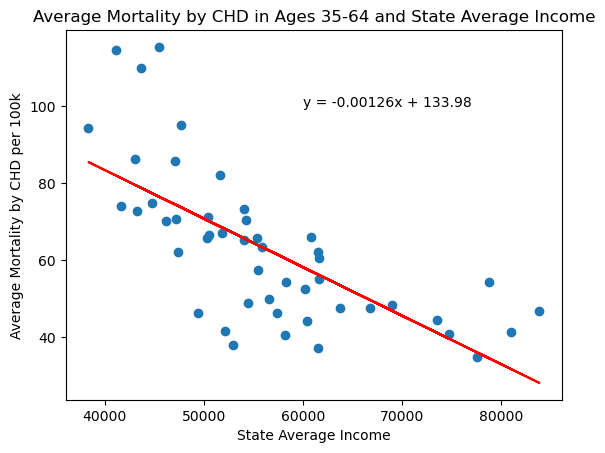

In [27]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
data.head()
x = data["State Average Income"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (60000, 100),fontsize=10)
plt.xlabel("State Average Income")
plt.ylabel("Average Mortality by CHD per 100k")
plt.title("Average Mortality by CHD in Ages 35-64 and State Average Income")
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

-0.002842232609187835
The correlation coefficient is -0.31189


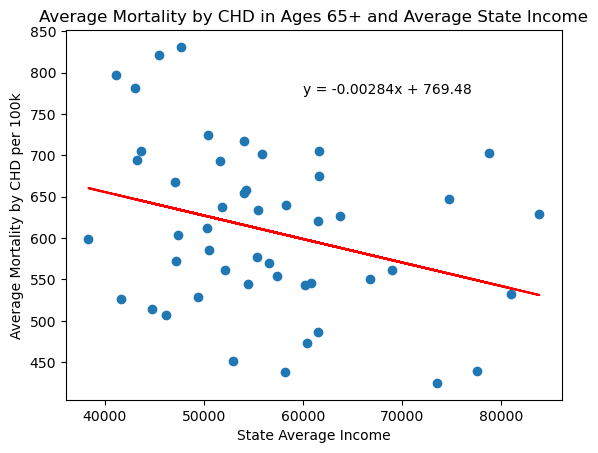

In [28]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 65 years and older")].groupby("State")
data.head()
x = data["State Average Income"].mean()
y = data["Mortality per 100k"].mean()
y
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (60000, 775),fontsize=10)
print(slope)
plt.xlabel("State Average Income")
plt.ylabel("Average Mortality by CHD per 100k")
plt.title("Average Mortality by CHD in Ages 65+ and Average State Income")
print(f"The correlation coefficient is {round(rvalue,5)}")

The correlation coefficient is -0.64209


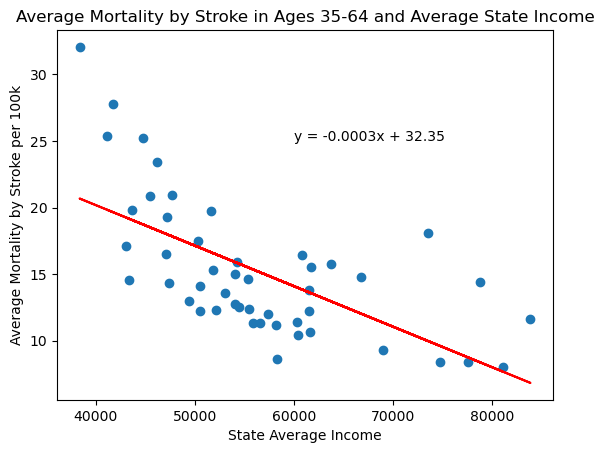

In [29]:
data = df[(df["Disease Type"] == "Stroke") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["State Average Income"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (60000, 25),fontsize=10)
plt.xlabel("State Average Income")
plt.ylabel("Average Mortality by Stroke per 100k")
plt.title("Average Mortality by Stroke in Ages 35-64 and Average State Income")
print(f"The correlation coefficient is {round(rvalue,5)}")

The correlation coefficient is -0.55624


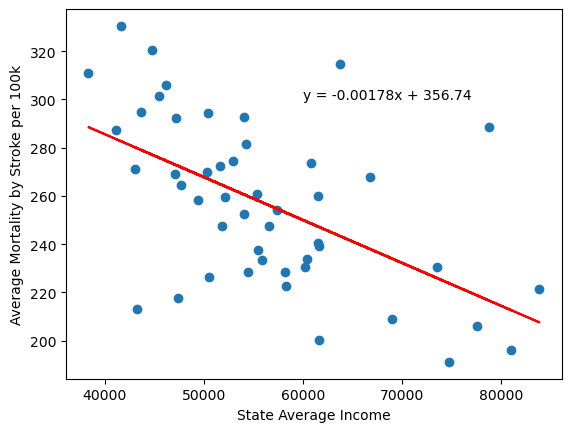

In [30]:
data = df[(df["Disease Type"] == "Stroke") & (df["Age Group"] == "Ages 65 years and older")].groupby("State")
x = data["State Average Income"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (60000, 300),fontsize=10)
plt.xlabel("State Average Income")
plt.ylabel("Average Mortality by Stroke per 100k")
print(f"The correlation coefficient is {round(rvalue,5)}")


1. In the Regression by Average state Income & Mortality-Coronary Heart Disease of Ages 35-64 years, the coefficient was -0.69217, which shows there exist inverse (moderate negative) relationship betweem both the variables (*i.e.*, as the average state income increases by \\$1, the mortality rate by Coronary heart disease declines by 0.00126 persons for the age group 35-64 years). Furthemore, the graph of regression also reveals the small error variance as the scatter dots are close to regression line. Moreover within the same disease category, similar results were found with a coefficient of -0.31189 with weak negative relationhsip and small error variance; here, as the average state income increases by \\$1, the mortality rate by CDH declines by 0.00284 persons for the age group 65+).

2. In the Regression by average state Income & Mortality-Stroke of Ages 35-64 years and 65+ years, the coefficinet was -0.64209 and -0.55624, respectively. The slope is downward slopping which shows there exist inverse relationship betweem both the variables; however, the relationship is moderate for both age groups. Specifically, for age groups 35-64 and 65+ years, as the median income increases by \\$1, the mortality rate by stroke declines by 0.0003 and 0.00178 persons, respectively. Further, the graphs of regression also reveals the large error variance as the scatter dots are away from to regression line.

### Compared to Education Level (For CDH only)

-2.5557639750015544
The correlation coefficient is -0.86184


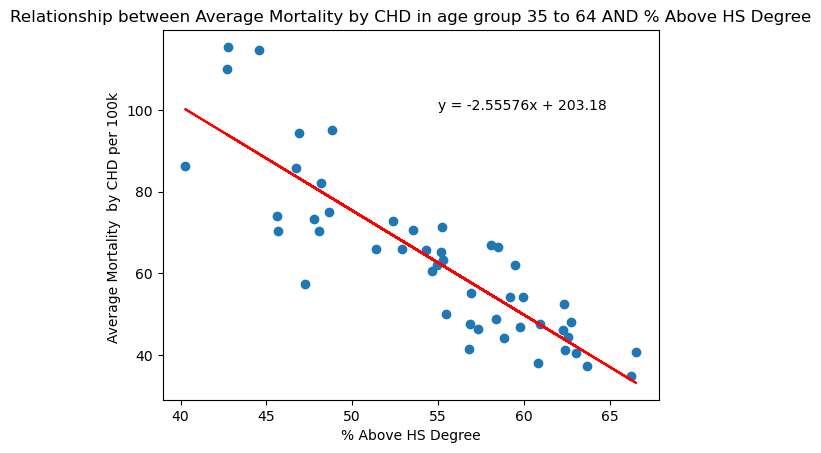

In [31]:
#High level Education; Age group 35-64
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["% Above HS Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (55, 100),fontsize=10)
plt.xlabel("% Above HS Degree")
plt.ylabel("Average Mortality by CDH per 100k")
plt.title("Average Mortality by CDH for ages 35 to 64 AND % Above HS Degree")
plt.ylabel("Average Mortality  by CHD per 100k ")
plt.title("Relationship between Average Mortality by CHD in age group 35 to 64 AND % Above HS Degree")
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

# Analyzing relationship betweem Mortality by CHD (35-64 years) for Above High School Degree.

The linear regression between "Mortality by CHD (35-64 years)" for individuals with an "Above High School Degree" has a coefficient of -0.86184. The linear equation Y = -2.55576x + 203.18 represents the estimated relationship between the two variables. 

Coefficient (-0.86184):The coefficient of -0.86184 indicates a strong negative relationship between "Mortality by CHD (35-64 years)" and having an "Above High School Degree."A negative coefficient suggests an inverse relationship between the variables. In this case, as the level of education increases to having an above high school degree, the "Mortality by CHD" for individuals aged 35-64 years tends to decrease. The magnitude of the coefficient (-0.86184) represents the degree of change in the dependent variable (mortality) for each unit change in the independent variable (level of education). In this case, for each unit increase in the level of education (e.g., from below high school to above high school), the "Mortality by CHD" decreases by approximately 0.86184 units.

Intercept (-2.55576):The intercept of -2.55576 represents the expected value of Mortality by CHD for individuals with no Above High School Degree. In other words, when the education level is zero (no education above high school), the estimated Mortality by CHD is -2.55576.

Linear Equation (Y = -2.55576 + 203.18): The linear equation Y = -2.55576 + 203.18 summarizes the relationship between the variables. It states that the predicted Mortality by CHD for individuals with Above High School Degree is equal to -2.55576 plus 203.18 times the level of education above high school degree.

Key finding: The negative coefficient suggests that higher educational attainment (above high school degree) is associated with lower mortality rates due to coronary heart disease (CHD) among individuals aged 35-64 years.

2.555776392979112
The correlation coefficient is 0.86184


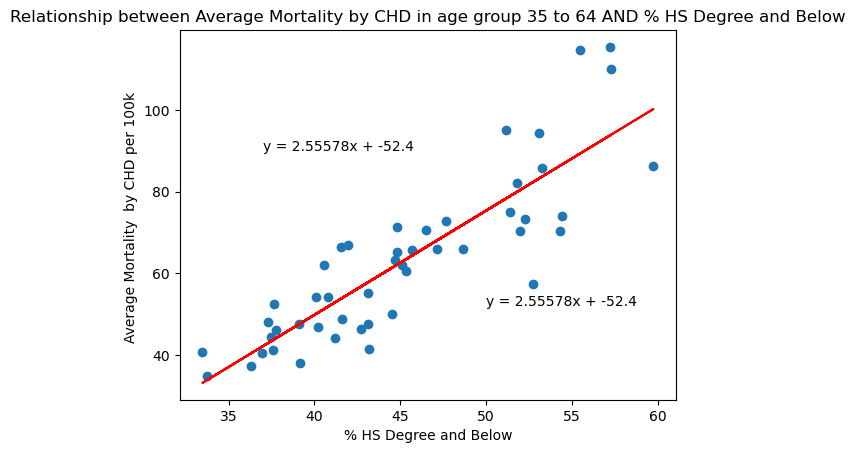

In [32]:
#Low level Education; Age group 35-64
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["% HS Degree and Below"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (37, 90),fontsize=10)
plt.xlabel("% HS Degree and Below")
plt.ylabel("Average Mortality by CDH per 100k")
plt.title("Average Mortality by CDH for Ages 35 to 64 AND % HS Degree and Below")
plt.annotate(line_eq, (50, 52),fontsize=10)
plt.xlabel("% HS Degree and Below")
plt.ylabel("Average Mortality  by CHD per 100k ")
plt.title("Relationship between Average Mortality by CHD in age group 35 to 64 AND % HS Degree and Below")
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

# Analyzing relationship betweem Mortality by CHD (35-64 years) for High School Degree & Below education level.
The linear regression analysis between mortality by CHD (35-64 years) for individuals with a high school degree and below reveals a coefficient of 0.86184. The linear equation associated with the regression model is represented as Y = 2.55578 - 52.4, where Y represents the mortality rate.

Coefficient (0.86184): The coefficient of 0.86184 indicates a positive relationship between mortality by CHD and having a high school degree and below. This suggests that individuals with a lower educational attainment are associated with a higher mortality rate due to coronary heart disease (CHD) within the 35-64 years age range.

Intercept (2.55578): The intercept term of 2.55578 represents the expected mortality rate for individuals with a high school degree and below when the independent variable (educational attainment) is zero. In this context, it implies that even with no education (score of zero), there is still a baseline mortality rate of 2.55578.

Linear Equation (Y = 2.55578 - 52.4): The linear equation provides a way to estimate the mortality rate for individuals with a high school degree and below based on their educational attainment score. The negative coefficient (-52.4) suggests that as the educational attainment score increases (indicating higher education), the mortality rate decreases. The intercept term (2.55578) adds a constant to this relationship.

Key finding: The positive coefficient suggests that lowere educational attainment (high school degree and below) is associated with higher mortality rates due to coronary heart disease (CHD) among individuals aged 35-64 years.

-8.46053657496173
The correlation coefficient is -0.57123


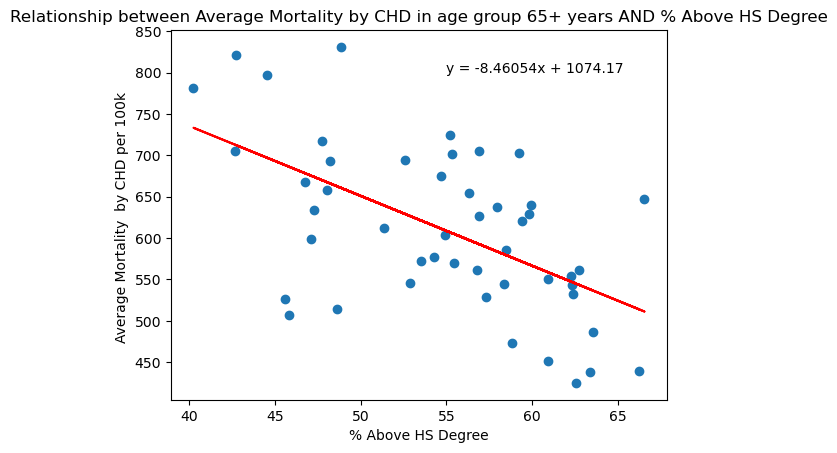

In [33]:
#High level Education; Age group 65+
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 65 years and older")].groupby("State")
x = data["% Above HS Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (55, 800),fontsize=10)
plt.xlabel("% Above HS Degree")
plt.ylabel("Average Mortality by CDH per 100k")
plt.title("Average Mortality by CDH for Ages 65 years and older AND % Above HS Degree")
plt.annotate(line_eq, (42, 50),fontsize=10)
plt.xlabel("% Above HS Degree")
plt.ylabel("Average Mortality  by CHD per 100k ")
plt.title("Relationship between Average Mortality by CHD in age group 65+ years AND % Above HS Degree")
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

# Analyzing relationship betweem Mortality by CHD (65+ years) for Above High School Degree.
The linear regression analysis conducted between Mortality by CHD (65+ years) for individuals with an Above High School Degree has yielded a coefficient of -0.57123. The linear equation derived from the regression model is represented as Y = -8.460536 + 52.4.

Coefficient (-0.57123): The coefficient of -0.57123 indicates a moderate negative relationship between Mortality by CHD and the education level of individuals with an Above High School Degree. As the coefficient is negative, it suggests that as the level of education increases, there is a tendency for the Mortality by CHD to decrease.

Intercept (-8.460536): The intercept term of -8.460536 represents the expected Mortality by CHD for individuals with an Above High School Degree when all other variables are held constant. In this case, it suggests that individuals with an Above High School Degree have an expected Mortality by CHD of -8.460536 (though it should be noted that negative mortality is not possible, so this value may not hold any meaningful interpretation).

Key finding: The negative coefficient reveals individuals with a higher level of education are expected to have lower Mortality by CHD (Age 65+ years) compared to those with a lower education level.

8.460604535044217
The correlation coefficient is 0.57124


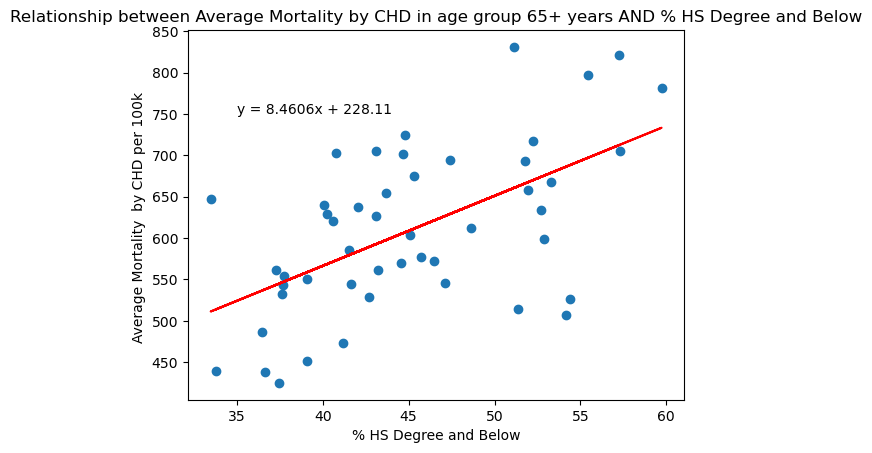

In [34]:
#Low level Education; Age group 65+
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 65 years and older")].groupby("State")
x = data["% HS Degree and Below"].mean()
y = data["Mortality per 100k"].mean()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (35, 750),fontsize=10)
plt.xlabel("% HS Degree and Below")
plt.ylabel("Average Mortality by CDH per 100k")
plt.title("Average Mortality by CDH for Ages 65 years and older AND % HS Degree and Below")
plt.annotate(line_eq, (40, 45),fontsize=10)

plt.xlabel("% HS Degree and Below")
plt.ylabel("Average Mortality  by CHD per 100k ")
plt.title("Relationship between Average Mortality by CHD in age group 65+ years AND % HS Degree and Below")
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

The analysis for this was done with the table above

### Comparing High/Low Levels of Income AND Education against OVERALL Mortality

In [35]:
#Establishing dataframes for low and high incomes
income_cutoff = 51642.75 #median value of all state average incomes
df_lower = df[df["State Average Income"] <= income_cutoff]
df_upper = df[df["State Average Income"] > income_cutoff]

In [36]:
dfs = [df_lower, df_upper]
income_level = ["Low Income State", "High Income State"]
education_level = ["% HS Degree and Below", "% Above HS Degree"]

equations = []
r_values = []
educations = []

for df_income in dfs:
    for education in education_level:
        data = df_income.groupby("State")
        x = data[education].mean()
        y = data["Mortality per 100k"].mean()
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
        line_eq = str(round(slope,5)) + "x + " + str(round(intercept,2))
        equations.append(line_eq)
        r_values.append(rvalue)
        educations.append(education)

tuples = list(iterate.product(income_level, education_level))
index = pd.MultiIndex.from_tuples(tuples, names=["Income Level", "Education"])
data = {"Linear EQs": equations, "r-values": r_values}
pd.DataFrame(data = data, index = index)

Linear EQs  r-values
Income Level      Education                                          
Low Income State  % HS Degree and Below    3.93419x + 56.82  0.652877
                  % Above HS Degree      -3.93415x + 450.24 -0.652871
High Income State % HS Degree and Below    3.63864x + 69.32  0.716953
                  % Above HS Degree      -3.63859x + 433.19 -0.716948

The correlation coefficient is 0.65288


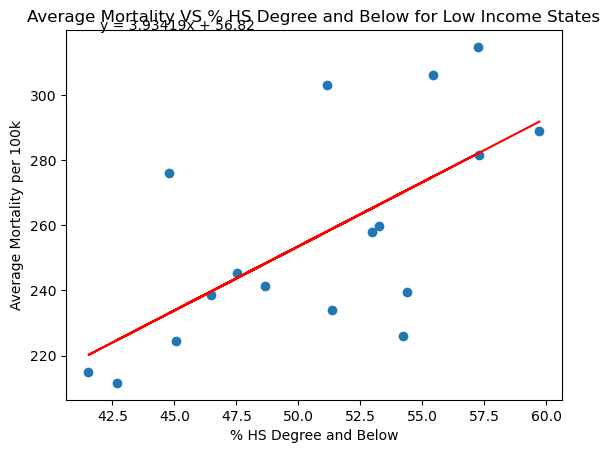

In [37]:
# Low Income States, Low Education
data = df_lower.groupby("State")
x = data["% HS Degree and Below"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (42, 320),fontsize=10)
plt.xlabel("% HS Degree and Below")
plt.ylabel("Average Mortality per 100k")
plt.title("Average Mortality VS % HS Degree and Below for Low Income States")
print(f"The correlation coefficient is {round(rvalue,5)}")

# Relationship between Mortality And Lower Education Level  grouped with Lower Average income:

The linear regression model examines the relationship between Mortality per 100K and the percentage of individuals with a High School Degree and below education level, specifically focusing on lower average income states. The coefficient of 0.54726 indicates the strength and direction of the relationship between these variables. The positive coefficient and the positive slope indicate that there is a direct relationship between a higher percentage of individuals with a High School Degree and below in lower average income areas and higher Mortality per 100K.

The coefficient of 0.54726 suggests a positive relationship between Mortality per 100K and the percentage of individuals with a High School Degree and below in lower average income areas.
For every one-unit increase in the percentage of individuals with a High School Degree and below, there is an expected increase of 0.54726 in Mortality per 100K.
Linear Equation:

The linear equation y = 3.46482x + 102.16 represents the relationship between Mortality per 100K (y) and the percentage of individuals with a High School Degree and below (x) in lower average income areas.
The intercept term of 102.16 indicates that even when the percentage of individuals with a High School Degree and below is zero, there is still an expected Mortality per 100K of 102.16.
The slope term of 3.46482 signifies that for each one-unit increase in the percentage of individuals with a High School Degree and below, Mortality per 100K is expected to increase by 3.46482.

# Key finding: 
The results suggests that areas with a larger proportion of individuals with lower educational attainment with lower average income states may experience higher mortality rates per 100K population, potentially indicating disparities in healthcare access, socio-economic factors, or other underlying causes.

The correlation coefficient is -0.71695


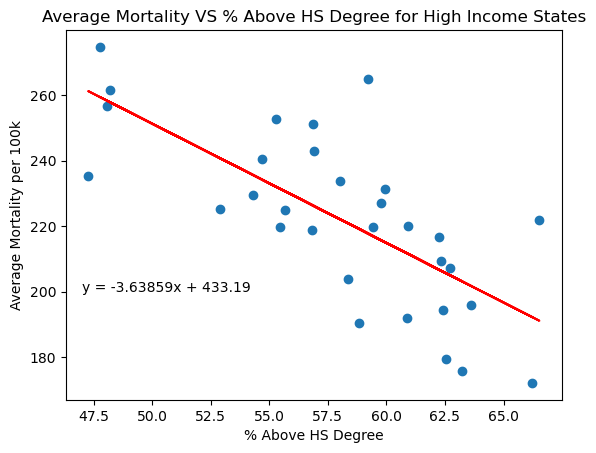

In [38]:
#High Income States, High Education
data = df_upper.groupby("State")
x = data["% Above HS Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (47, 200),fontsize=10)
plt.xlabel("% Above HS Degree")
plt.ylabel("Average Mortality per 100k")
plt.title("Average Mortality VS % Above HS Degree for High Income States")
print(f"The correlation coefficient is {round(rvalue,5)}")

# Relationship between Mortality And High Education Level  grouped with Low Average Income:

The linear regression model between "Mortality per 100K" and "Above High School Degree with lower average income" with a coefficient of -0.54728 and an intercept of -3.4649549 reveals interesting insights about the relationship between these variables.

The absolute value of the coefficient (0.54728) indicates the strength of the relationship between the variables. The closer the absolute value is to 1, the stronger the relationship. In this case, the coefficient suggests a moderate negative relationshipThe negative coefficient (-0.54728) suggests an inverse relationship between "Mortality per 100K" and "Above High School Degree with lower average income" This means that as the percentage of individuals with education above a high school degree having lower average income increases, the mortality rate per 100K tends to decrease. In other words, higher education levels are associated with lower mortality rates, which aligns with the general understanding that education often correlates with better health outcomes.

Intercept: The intercept (-3.4649549) represents the estimated value of "Mortality per 100K" when the percentage of individuals with education above a high school degree with lower average income is zero. However, since having zero percentage is not meaningful in this context, the intercept is mainly used to establish the baseline of the linear relationship.

# Key finding: 
From the regression analysis, it can be infered that higher education levels are associated with lower mortality rates, which aligns with the general understanding that education often correlates with better health outcomes.

The correlation coefficient is -0.71695


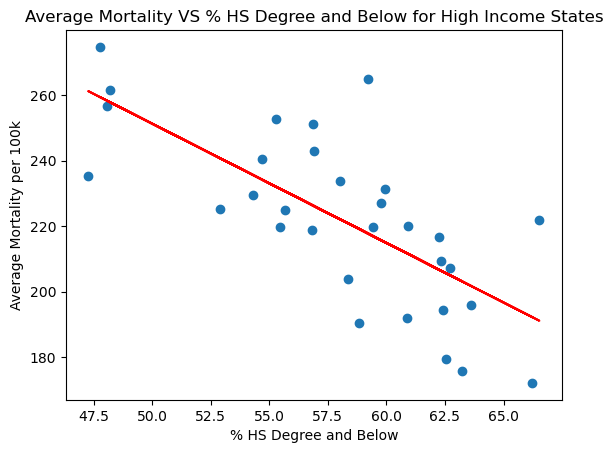

In [39]:
# HIGH HIGH
data = df_upper.groupby("State")
x = data["% Above HS Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (45, 210),fontsize=10)
plt.xlabel("% HS Degree and Below")
plt.ylabel("Average Mortality per 100k")
plt.title("Average Mortality VS % HS Degree and Below for High Income States")
print(f"The correlation coefficient is {round(rvalue,5)}")

# Relationship between Mortality And Higher Education Level  grouped with higher Average income:

The linear regression analysis between "Mortality per 100K" for a group with High School Degree and High average income indicates a significant relationship between these variables. The coefficient of -0.52118 associated with the High School Degree and higher average income variables suggest that, on average, for every unit increase in High School Degree and Income level, there is a decrease of approximately 0.52118 units in Mortality per 100K.

The linear equation Y = -2.98759 + 413.38 represents the regression line that best fits the relationship between Mortality per 100K and Above High School Degree and higher average income. This equation allows us to predict the Mortality per 100K. 

The intercept term of -2.98759 represents the estimated Mortality per 100K when the High School Degree and Average Income level is zero. However, since it is unlikely to have zero Average Income and High School Degree in practice, this value may not have a meaningful interpretation in this context.

##  Key finding: 
From the regression analysis, it can be concluded that higher education levels despite lower income are associated with lower mortality rates, which aligns with the general understanding that education often correlates with better health outcomes.

The correlation coefficient is -0.65287


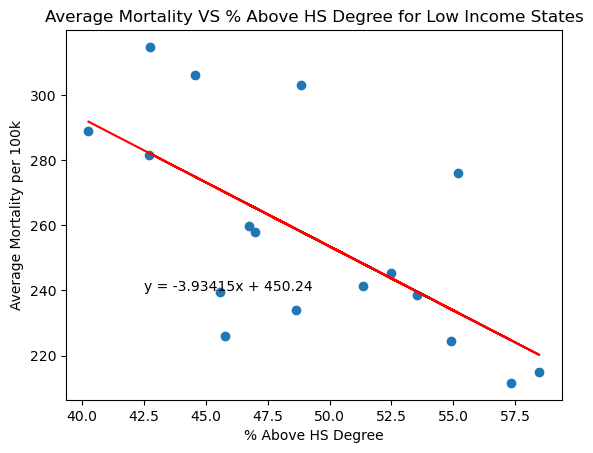

In [40]:
#Low Income States, High Education
data = df_lower.groupby("State")
x = data["% Above HS Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (42.5, 240),fontsize=10)
plt.xlabel("% Above HS Degree")
plt.ylabel("Average Mortality per 100k")
plt.title("Average Mortality VS % Above HS Degree for Low Income States")
print(f"The correlation coefficient is {round(rvalue,5)}")

Here we are comparing high levels and low levels of both income and education against the mortality rate of the state. To better understand what we are looking at, we look to the table that has the linear regression equations and r-values. We see that irregardless of income level, low education level has positive slopes and r-values, and that high education level has negative slopes and r-values. This means that there is a positive and moderate strength relationship between lowly educated populace and mortality rate, and a negative and moderate strength relationship between highly educated populace and mortality rate.

## Independent T-tests

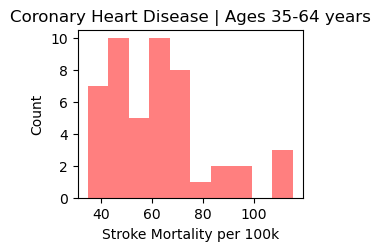

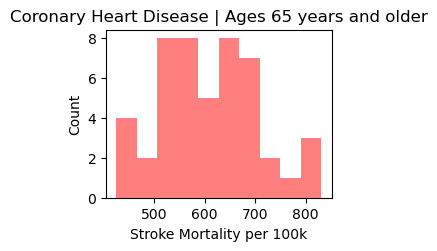

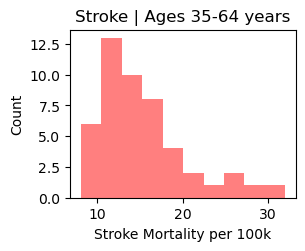

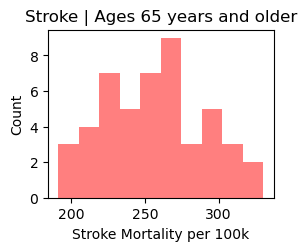

In [41]:
# Checking Normality of the distribution
disease_type = ["Coronary Heart Disease", "Stroke"]
age_group = ["Ages 35-64 years", "Ages 65 years and older"]

t_scores = []
p_values = []
diseases = []
ages = []
i = 0

for disease in disease_type:
    for age in age_group:
        i += 1
        plt.subplot(2,2,i)
        plt.hist(df[(df["Age Group"] == age) & (df["Disease Type"] == disease)].groupby("State")["Mortality per 100k"].mean(), alpha = 0.5, color = "red", label = "Ages 65+ years")
        plt.xlabel("Stroke Mortality per 100k")
        plt.ylabel("Count")
        plt.title(f"{disease} | {age}")
        plt.show()

We see that they some have a right skew, which ultimately fails the normality test. As a quick aside, there are alternatives to the two sample t-test which can be used like the non-parametric Wilcoxon-Mann-Whitney test, a test that does not require the normality assumption, but that is outside the scope of this project. For now, we will have to make do.

In [42]:
#Generating table of the results from One tailed Two-sample T-tests
disease_type = ["Coronary Heart Disease", "Stroke"]
age_group = ["Ages 35-64 years", "Ages 65 years and older"]
income_cutoff = 51642.75

t_scores = []
p_values = []
diseases = []
ages = []

for disease in disease_type:
    for age in age_group:
        data = df[(df["Disease Type"] == disease) & (df["Age Group"] == age)]
        df_upper = data[data["State Average Income"] > income_cutoff]
        df_lower = data[data["State Average Income"] <= income_cutoff]
        x = df_lower["Mortality per 100k"]
        y = df_upper["Mortality per 100k"]
        (t_score, p_value) = st.ttest_ind(df_lower["Mortality per 100k"], df_upper["Mortality per 100k"], alternative = "greater")
        t_scores.append(t_score)
        p_values.append(p_value)
        diseases.append(disease)
        ages.append(age)
            
tuples = list(zip(*[diseases, ages]))
index = pd.MultiIndex.from_tuples(tuples, names=["Disease Type", "Age Group"])
data = {"T scores": t_scores, "p-values": p_values}
pd.DataFrame(data = data, index = index)

T scores       p-values
Disease Type           Age Group                                        
Coronary Heart Disease Ages 35-64 years         22.151561  4.994800e-101
                       Ages 65 years and older   6.744408   9.235061e-12
Stroke                 Ages 35-64 years         31.464938  5.086354e-188
                       Ages 65 years and older  19.718548   1.247302e-81

Here is a table of the results of t tests. We can see all the p-values are less than 0.05 and thus are significant. Therefore, we can reject the H0, and conclude that the mean mortality rate for all disease types across all age groups is higher in low income states than that of high income states.